<a href="https://colab.research.google.com/github/tiaherdi/Traffic-Sign-5/blob/main/Traffic_Sign_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [57]:
# Import library

import tensorflow as tf
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np # linear algebra
import matplotlib.pyplot as plt
import seaborn as sns # graph

In [67]:
# Read file from dataset via github 
dataset = pd.read_csv('https://raw.githubusercontent.com/tiaherdi/Traffic-Sign-5/main/covid_impact_on_airport_traffic.csv?token=GHSAT0AAAAAABXA5PPA7PLPVB43P6JR52PMYXBF2MQ')
dataset.head()

,AggregationMethod,Date,Version,AirportName,PercentOfBaseline,Centroid,City,State,ISO_3166_2,Country,Geography
0,Daily,2020-04-03,1.0,Kingsford Smith,64,POINT(151.180087713813 -33.9459774986125),Sydney,New South Wales,AU,Australia,"POLYGON((151.164354085922 -33.9301772341877, 1..."
1,Daily,2020-04-13,1.0,Kingsford Smith,29,POINT(151.180087713813 -33.9459774986125),Sydney,New South Wales,AU,Australia,"POLYGON((151.164354085922 -33.9301772341877, 1..."
2,Daily,2020-07-10,1.0,Kingsford Smith,54,POINT(151.180087713813 -33.9459774986125),Sydney,New South Wales,AU,Australia,"POLYGON((151.164354085922 -33.9301772341877, 1..."
3,Daily,2020-09-02,1.0,Kingsford Smith,18,POINT(151.180087713813 -33.9459774986125),Sydney,New South Wales,AU,Australia,"POLYGON((151.164354085922 -33.9301772341877, 1..."
4,Daily,2020-10-31,1.0,Kingsford Smith,22,POINT(151.180087713813 -33.9459774986125),Sydney,New South Wales,AU,Australia,"POLYGON((151.164354085922 -33.9301772341877, 1..."


1. Exploratory Data Analysis (EDA)

In [68]:
# Data distribution based on country
data_per_negara = dataset.groupby("Country").count()
data_per_negara

,AggregationMethod,Date,Version,AirportName,PercentOfBaseline,Centroid,City,State,ISO_3166_2,Geography
Country,,,,,,,,,,
Australia,257,257,257,257,257,257,257,257,257,257
Canada,2311,2311,2311,2311,2311,2311,2311,2311,2311,2311
Chile,238,238,238,238,238,238,238,238,238,238
United States of America (the),4441,4441,4441,4441,4441,4441,4441,4441,4441,4441


In [69]:
# Five earliest data sort by Date
data = dataset.sort_values(by="Date")
data.head()

,AggregationMethod,Date,Version,AirportName,PercentOfBaseline,Centroid,City,State,ISO_3166_2,Country,Geography
302,Daily,2020-03-16,1.0,Santiago International Airport,96,POINT(-70.7942372739446 -33.3907265266744),Santiago,Santiago Province,CL,Chile,"POLYGON((-70.8043956756592 -33.3719683869737, ..."
1713,Daily,2020-03-16,1.0,Halifax International,72,POINT(-63.5116720134583 44.8830168353507),Halifax,Nova Scotia,CA-NS,Canada,"POLYGON((-63.5266613960266 44.8984438169036, -..."
3963,Daily,2020-03-16,1.0,Hartsfield-Jackson Atlanta International,92,POINT(-84.4279188822754 33.6410758198944),College Park,Georgia,US-GA,United States of America (the),"POLYGON((-84.4299745559692 33.657852680999, -8..."
2989,Daily,2020-03-16,1.0,Los Angeles International,98,POINT(-118.404993180627 33.941369379328),Los Angeles,California,US-CA,United States of America (the),"POLYGON((-118.439612388611 33.9517616366508, -..."
5701,Daily,2020-03-16,1.0,McCarran International,68,POINT(-115.14888081287 36.082853976328),Paradise,Nevada,US-NV,United States of America (the),"POLYGON((-115.158487558365 36.1007120735771, -..."


In [72]:
# Five latest data after sorted by Date
data.tail()

,AggregationMethod,Date,Version,AirportName,PercentOfBaseline,Centroid,City,State,ISO_3166_2,Country,Geography
2981,Daily,2020-12-02,1.0,Los Angeles International,81,POINT(-118.404993180627 33.941369379328),Los Angeles,California,US-CA,United States of America (the),"POLYGON((-118.439612388611 33.9517616366508, -..."
4874,Daily,2020-12-02,1.0,Boston Logan International,66,POINT(-71.0102909977065 42.3636330376787),Boston,Massachusetts,US-MA,United States of America (the),"POLYGON((-71.0050892829895 42.3472534332511, -..."
533,Daily,2020-12-02,1.0,Calgary International,99,POINT(-114.013122872131 51.1184753727795),Calgary,Alberta,CA-AB,Canada,"POLYGON((-113.981866836548 51.1392131913567, -..."
1485,Daily,2020-12-02,1.0,Winnipeg International,100,POINT(-97.2190621861971 49.9024712565967),Winnipeg,Manitoba,CA-MB,Canada,"POLYGON((-97.2094345092773 49.8979517850609, -..."
2345,Daily,2020-12-02,1.0,Montreal Mirabel,100,POINT(-74.048379779338 45.6815027038316),Mirabel,Quebec,CA-QC,Canada,"POLYGON((-74.0895652770996 45.6856314730097, -..."


In [77]:
# Describing descriptive statistic on Percent of Baseline
data.describe()

,PercentOfBaseline
count,7247.000000
mean,66.651442
std,22.134433
min,0.000000
25%,53.000000
50%,67.000000
75%,84.000000
max,100.000000


In [89]:
# Feature selection -> get data needed
data = dataset.drop(['AggregationMethod', 'Version', 'ISO_3166_2', 'Geography', 'Centroid', 'State', 'City'], 
                         axis=1)
data = data.sort_values(by="Date")
data.head()

,Date,AirportName,PercentOfBaseline,Country
302,2020-03-16,Santiago International Airport,96,Chile
1713,2020-03-16,Halifax International,72,Canada
3963,2020-03-16,Hartsfield-Jackson Atlanta International,92,United States of America (the)
2989,2020-03-16,Los Angeles International,98,United States of America (the)
5701,2020-03-16,McCarran International,68,United States of America (the)


In [80]:
# Creating DataFrame based on country
data_per_negara = data.groupby('Country')
australia = data_per_negara.get_group('Australia')
canada = data_per_negara.get_group('Canada')
chile = data_per_negara.get_group('Chile')
us  = data_per_negara.get_group('United States of America (the)')

Visualization Percent of Baseline based on country and date

In [84]:
# Data (date, percent of baseline, country)

# Style
sns.set(font_scale=1)
sns.set_style("whitegrid")

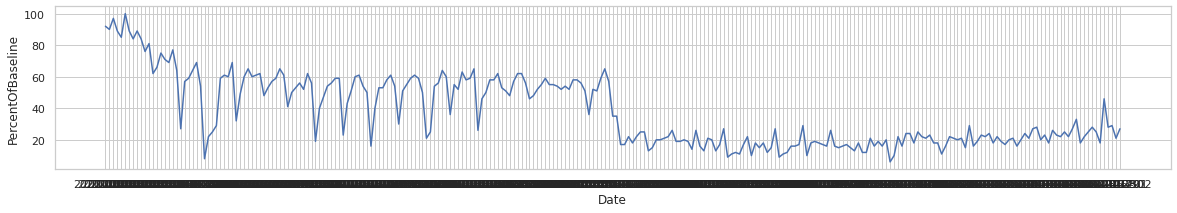

In [90]:
# Visualization Australia
fig, ax = plt.subplots(figsize=(20,3))
sns.lineplot(data=australia, x='Date', y='PercentOfBaseline')

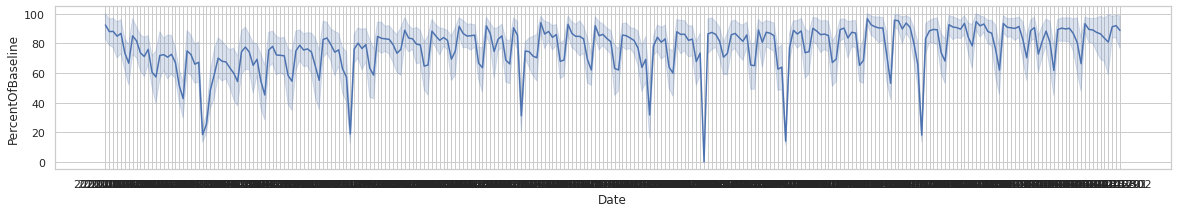

In [91]:
# Visualization Canada
fig, ax = plt.subplots(figsize=(20,3))
sns.lineplot(data=canada, x='Date', y='PercentOfBaseline')

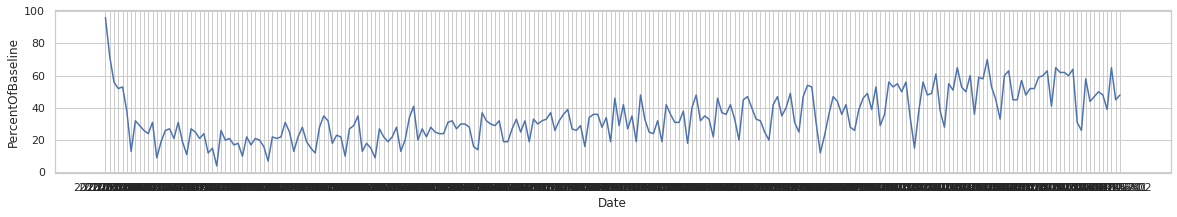

In [92]:
# Visualization Canada
fig, ax = plt.subplots(figsize=(20,3))
sns.lineplot(data=chile, x='Date', y='PercentOfBaseline')

In [ ]:
# Visualization US
fig, ax = plt.subplots(figsize=(20,3))
sns.lineplot(data=us, x='Date', y='PercentOfBaseline')

2. Time-Series Analysis

In [88]:
# Percent of Baseline per-country
baseline_au = australia.PercentOfBaseline.sort_index()
baseline_au 

0      64
1      29
2      54
3      18
4      22
       ..
252    11
253    60
254    53
255    59
256    55
Name: PercentOfBaseline, Length: 257, dtype: int64